In [56]:
#Preprocessing of the data
import numpy as np

#Takes as input the Train and test data(both to handle the case of missing values for the one hot encoding)
# Normalise the columns inherently with numeric values and also have functionality to add columns with functions
# applied to the numeric columns 

def get_features_from_input(df_x, df_dum):
    
    processed_df_x = df_x
    df_new = pd.concat([df_x, df_dum])
    processed_df_x = pd.get_dummies(df_new)
    fs = np.split(processed_df_x, [len(df_x)], axis=0)[0]
    processed_df_x = fs

    processed_df_x.fillna(processed_df_x.mean(), inplace=True)
    
#     processed_df_x_new_cols = processed_df_x
    
    cols_to_norm = list(processed_df_x)[0:4] + list(processed_df_x)[6:8]
    processed_df_x[cols_to_norm] = processed_df_x[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    mod1 = processed_df_x.iloc[:, 0:4]
    mod2 = processed_df_x.iloc[:, 6:8]
    
    mod = pd.concat([mod1, mod2], axis=1)
    
    squared = mod
    squared = squared.applymap(lambda x : x*x)
    squared.rename(columns=lambda x : "Squared" + str(x), inplace=True)
    
    log_df = mod
    log_df = log_df.applymap(lambda x : np.log(x+1))
    log_df.rename(columns=lambda x : "Log" + str(x), inplace=True)

    sqrt_df = mod
    sqrt_df = sqrt_df.applymap(lambda x : np.sqrt(x))
    sqrt_df.rename(columns=lambda x : "Sqrt"+str(x), inplace=True)
    
    # Uncomment the parameter combination that you want to use
    list_new_cols = [squared, log_df, sqrt_df]
#     list_new_cols = [squared]
#     list_new_cols = []
    processed_df_x_new_cols = pd.concat([processed_df_x] + list_new_cols, axis=1)
    
    x = processed_df_x_new_cols.as_matrix()
    return x

In [57]:
import pandas as pd

df = pd.read_csv('trainSold.csv', index_col=0)
df_dum = pd.read_csv('testSold.csv', index_col=0)

y = df['SaleStatus'].as_matrix()

df_x = df.drop('SaleStatus', axis=1)

X = get_features_from_input(df_x, df_dum)


In [58]:
# print(X.shape)

In [59]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape[0])

1022


In [60]:
#Prints to check the size of the two sets

# print(len(X_train))
# print(len(X_test))
# print(len(y_train))
# print(len(y_test))


In [61]:
# cols = list(df)
# print("Original column len",len(cols))
# print("New column length", X.shape[1])
# print(df['MSZoning'])

In [62]:
# print(processed_df_x)
# print(x_train)

In [63]:
score_list = []
# Classifier1 is an SVC
from sklearn.svm import SVC

clf1 = SVC(gamma=0.0001)
clf1.fit(X_train, y_train)

sc = clf1.score(X_test, y_test)
print(sc)
score_list.append(sc)

0.794520547945


[0.55251141552511418, 0.65068493150684936, 0.79452054794520544, 0.79452054794520544, 0.79680365296803657, 0.78995433789954339]
1e-05


<IPython.core.display.Javascript object>


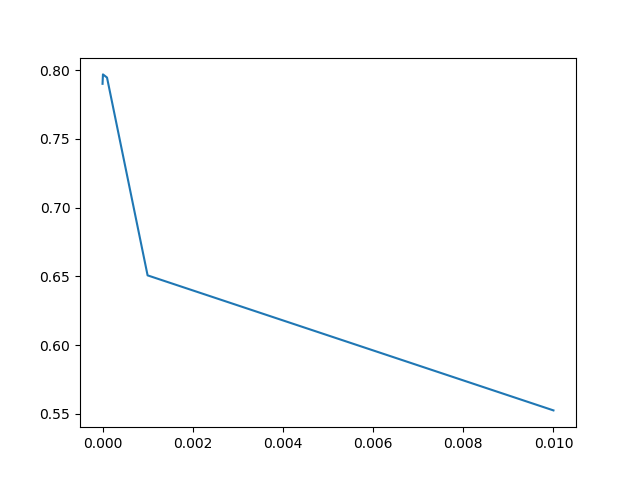

In [89]:
#Tuning the parameters of SVC
%matplotlib notebook
import matplotlib.pyplot as plt

score_svc = []
gamma_list = [0.01, 0.001, 0.0001, 1e-4, 1e-5, 1e-6]
for gamma in gamma_list:
    clf_temp = SVC(gamma=gamma)
    clf_temp.fit(X_train, y_train)
    score_svc.append(clf_temp.score(X_test, y_test))

max_sc_ind = 0
for i in range(0,len(score_svc)):
    if score_svc[i] > score_svc[max_sc_ind]:
        max_sc_ind = i
        
print(score_svc)
gamma_final = gamma_list[max_sc_ind]
print(gamma_final)

plt.plot(gamma_list,score_svc)

[0.65068493150684936, 0.66438356164383561, 0.65753424657534243, 0.65981735159817356, 0.65981735159817356]
10


<IPython.core.display.Javascript object>


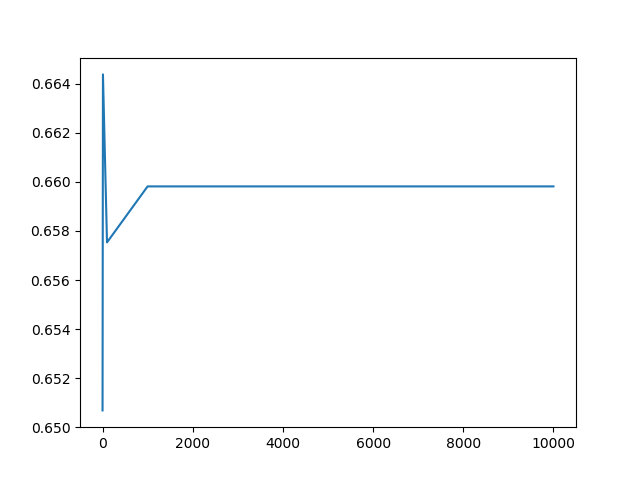

In [40]:
%matplotlib notebook
import matplotlib.pyplot as plt

score_svc = []

C_list = [1, 10, 100, 1000, 10000]

for C in C_list:
    clf_temp = SVC(gamma=0.001,C=C)
    clf_temp.fit(X_train, y_train)
    score_svc.append(clf_temp.score(X_test, y_test))

max_sc_ind = 0
for i in range(0,len(C_list)):
    if score_svc[i] > score_svc[max_sc_ind]:
        max_sc_ind = i
        
print(score_svc)
gamma_final = C_list[max_sc_ind]
print(gamma_final)

plt.plot(C_list,score_svc)


In [65]:
# Classifier2 is a DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

random_state_list  = []

In [66]:

clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [67]:
sc = clf2.score(X_test, y_test)
print(sc)
score_list.append(sc)

0.947488584475


[0.91552511415525117, 0.92009132420091322, 0.92465753424657537, 0.92465753424657537, 0.92465753424657537]
30


<IPython.core.display.Javascript object>


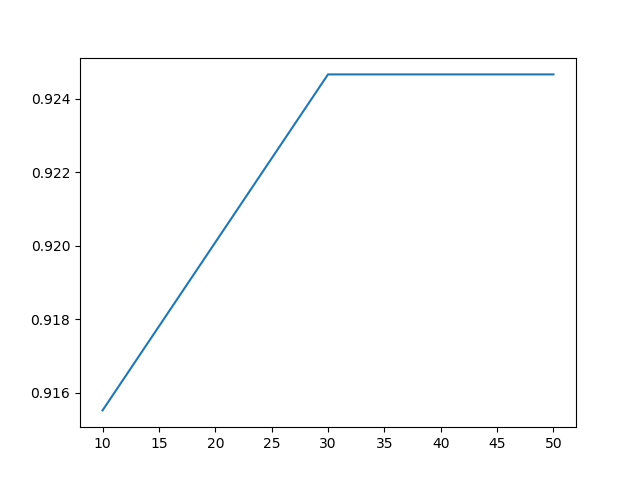

In [78]:
# Classifier3 is Random Forest Classifier with num_of_trees as parameter
from sklearn.ensemble import RandomForestClassifier
%matplotlib notebook
import matplotlib.pyplot as plt

score_svc = []

n_estimators_list = [10,20,30,40,50]

for n_estimators in n_estimators_list:
    clf_temp = RandomForestClassifier(n_estimators=n_estimators)
    clf_temp.fit(X_train, y_train)
    score_svc.append(clf_temp.score(X_test, y_test))

max_sc_ind = 0
for i in range(0,len(n_estimators_list)):
    if score_svc[i] > score_svc[max_sc_ind]:
        max_sc_ind = i
        
print(score_svc)
gamma_final = n_estimators_list[max_sc_ind]
print(gamma_final)

plt.plot(n_estimators_list,score_svc)

In [83]:

clf3 = RandomForestClassifier(n_estimators=30)
clf3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
sc = clf3.score(X_test, y_test)
print(sc)
score_list.append(sc)

0.933789954338


In [90]:
#Classifier4 is the Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
clf4 = GaussianNB()

clf4.fit(X_train, y_train)

GaussianNB(priors=None)

In [91]:
sc = clf4.score(X_test, y_test)
print(sc)
score_list.append(sc)

0.705479452055


In [98]:
#Classifier5 is the LogisiticRegressionClassifier
from sklearn.linear_model import LogisticRegression

clf5 = LogisticRegression()
clf5.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
sc = clf5.score(X_test, y_test)
print(sc)
score_list.append(sc)


0.819634703196


In [100]:
# Classifier 6 is a Gaussian Process Classifier this takes time to train

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

clf6 = GaussianProcessClassifier(1.0 * RBF(1.0))
clf6.fit(X_train, y_train)

sc = clf6.score(X_test, y_test)
print(sc)
score_list.append(sc)

0.805936073059


In [103]:
#Save the best models
import pickle

final_model1 = SVC(gamma=0.0001)
final_model1.fit(X, y)

final_model2 = RandomForestClassifier(n_estimators=30)
final_model2.fit(X, y)

#Random Forests and the SVM
pickle.dump(final_model1, open('final_model1.pkl', 'wb'))
pickle.dump(final_model2, open('final_model2.pkl', 'wb'))